GridspecLayout(children=(Dropdown(description='Type de mouvement', layout=Layout(grid_area='widget001'), optio…

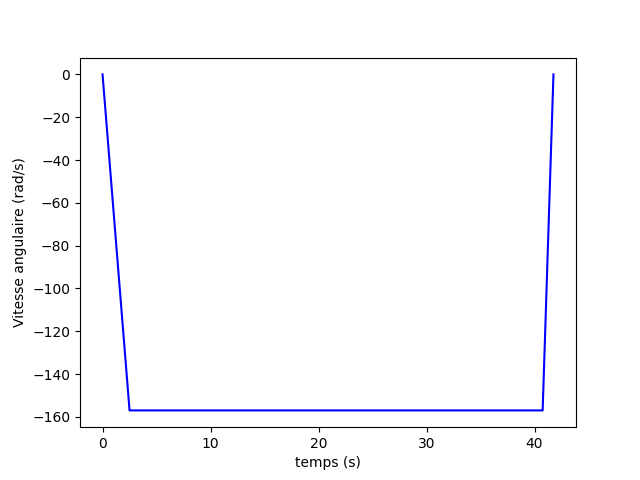

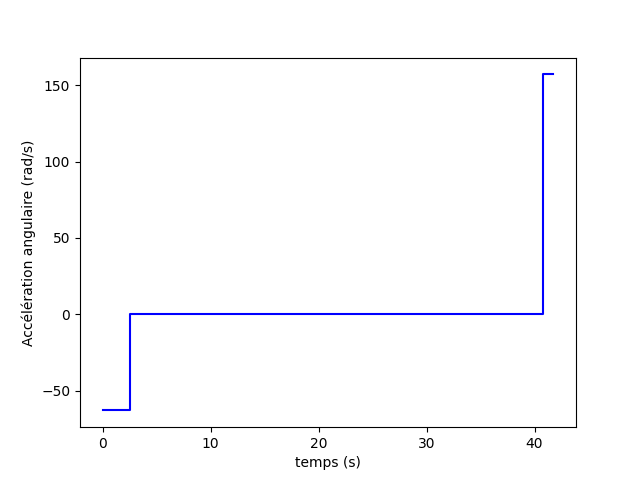

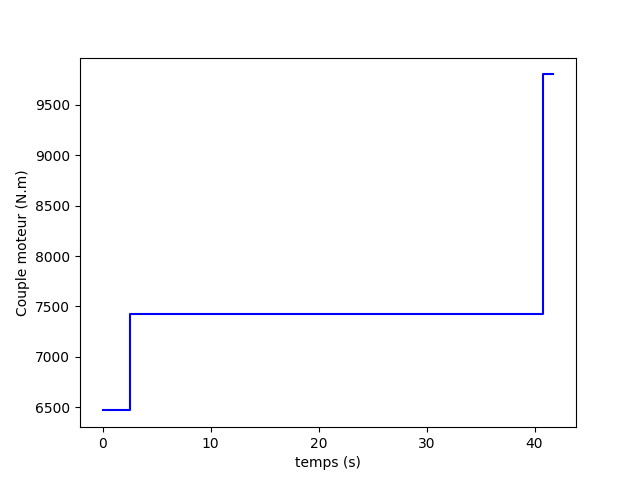

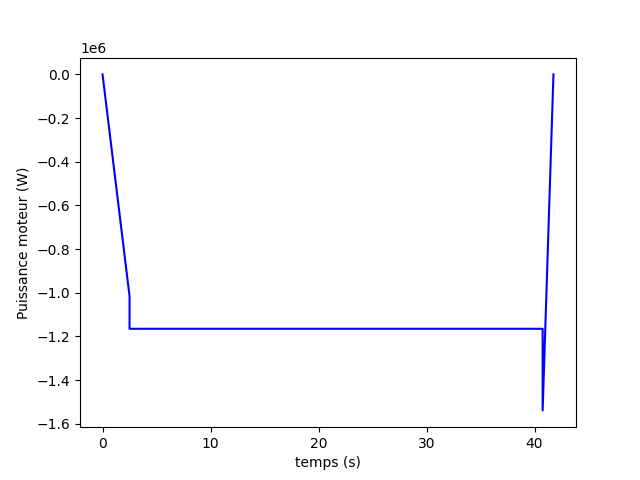

In [1]:
import ipywidgets as widgets
from ipywidgets import GridspecLayout, Button, BoundedIntText, Valid, Layout, Dropdown
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))
 
rows = 5
columns = 6

gs = GridspecLayout(rows, columns)

def on_result_change(change):
    row = int(change["owner"].layout.grid_row)
    gs[row, 5].value = gs[0, 0].value * row == change["new"]
    
def on_move_type_change(change):

    if gs[0, 0].value == 0:
        gs[2, 1].description = 'coefficient de transformation $K_t$ [rd/m]'
        gs[1, 2].description = 'force exercée par la charge $F_a\'$ [N]'
        gs[2, 2].description = 'Masse de la charge $M\'$ [kg]'
        
    else:
        gs[2, 1].description = 'coefficient de transmission $K_r$ '
        gs[1, 2].description = 'couple exercée par la charge $C\'$ [N.m]'
        gs[2, 2].description = 'Moment d\'inertie de la charge $J\'$ [kg.m²]'
        
    update_curves(change)
        
def on_load_phase_change(change):
    if gs[0, 1].value == 0:
        gs[4, 0].disabled = True
        gs[4, 2].disabled = True
    else:
        gs[4, 0].disabled = False
        gs[4, 2].disabled = False
    
    update_curves(change)
        

        
def get_moment_inertie_ramene(situation_phase):
    global coeff_K, rendement_mecanique, mass_ou_moment_charge
    m = masse_ou_moment_charge / coeff_K**2    
    if situation_phase == "entraînée" :
        m /= rendement_mecanique        
    else:         
        m *= rendement_mecanique      
    
    return m
        
def get_couple_charge_ramene(situation_phase):
    global coeff_K, rendement_mecanique, force_ou_couple_charge
    c = force_ou_couple_charge / coeff_K    
    if situation_phase == "entraînée" :
        c /= rendement_mecanique        
    else:         
        c *= rendement_mecanique      
        
    return c

        
        
style = {'description_width': 'initial'}

gs[0, 0] = Dropdown(description='Type de mouvement',
    options=[("Translation", 0), ("Rotation", 1)],
    value=0,style=style)

gs[0, 1] = Dropdown(description='Présence de la charge',
    options=[("Uniquement en RP", 0), ("Tout le temps", 1)],
    value=0,style=style)

gs[1, 0] = widgets.FloatSlider(description='Vitesse angulaire $\Omega$ [rd/s]',                           
    style=style,
    min=-10000,
    max=10000,
    step=0.1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    value=-157)

gs[2, 0] = widgets.FloatSlider(description='Moment propre $J$ [N.m]',                           
    style=style,
    min=0,
    max=10000,
    step=0.1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    value=1.0)

gs[1, 1] = widgets.FloatSlider(description='rendement mécanique $\eta$',                           
    style=style,
    min=0,
    max=1,
    step=0.01,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    value=0.9)

gs[2, 1] = widgets.FloatText(description='coefficient \r de transformation $K_t$ [rd/m] ',                           
    style=style,
    step=0.01,
    readout=True,
    readout_format='.2f',
    value=52.4)


gs[1, 2] = widgets.FloatText(description='force exercée par la charge $F_a\'$ [N] ',                           
    style=style,
    disabled=False,
    step=0.1,
    readout=True,
    readout_format='.2f',
    value=-350000.0)



gs[2, 2] = widgets.FloatText(description='Masse de la charge $M\'$ [kg]',                           
    style=style,
    disabled=False,
    step=0.1,
    readout=True,
    readout_format='.2f',
    value=35000)


gs[3, 0] = widgets.FloatText(description='Durée phase démarrage $t_d$ [s]',                           
    style=style,
    disabled=False,
    step=0.1,
    readout=True,
    readout_format='.2f',
    value=2.5)

gs[3, 1] = widgets.FloatText(description='Durée phase RP $t_{RP}$ [s]',                           
    style=style,
    disabled=False,
    step=0.1,
    readout=True,
    readout_format='.2f',
    value=38.25)

gs[3, 2] = widgets.FloatText(description='Durée phase freinage $t_{f}$ [s]',                           
    style=style,
    disabled=False,
    step=0.1,
    readout=True,
    readout_format='.2f',
    value=1.0)

gs[4, 0] = widgets.ToggleButtons(
    options=['entraînée', 'entraînante'],
    description='charge:',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['si la charge est entraînée', 'si la charge est entraînante'])

gs[4, 1] = widgets.ToggleButtons(
    options=['entraînée', 'entraînante'],
    description='charge:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['si la charge est entraînée', 'si la charge est entraînante'])


gs[4, 2] = widgets.ToggleButtons(
    options=['entraînée', 'entraînante'],
    description='charge:',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['si la charge est entraînée', 'si la charge est entraînante'])


# define easy pointers

# situation
type_mouvement = gs[0, 0].value #("Translation", 0), ("Rotation", 1)],
presence_charge = gs[0, 1].value #("Uniquement en RP", 0), ("Tout le temps", 1)
situation_phase1 = gs[4, 0].value #('entraînée':0), ('entraînante':1)
situation_phase2 = gs[4, 1].value #('entraînée':0), ('entraînante':1)
situation_phase3 = gs[4, 2].value #('entraînée':0), ('entraînante':1)

# temps
duree_demarrage = gs[3, 0].value   
duree_permanent = gs[3, 1].value
duree_freinage = gs[3, 2].value
durees = np.array([0.0, duree_demarrage, duree_permanent, duree_freinage])
x = np.cumsum(durees)

# propriétés machine/moteur
vitesse_angulaire = gs[1, 0].value
moment_propre = gs[2, 0].value

# propriétés mécanisme
rendement_mecanique = gs[1, 1].value
coeff_K = gs[2, 1].value

# propriétés charge
force_ou_couple_charge = gs[1, 2].value
masse_ou_moment_charge = gs[2, 2].value

# variables cinématiques
y_cinematique = np.array([0.0, vitesse_angulaire, vitesse_angulaire, 0.0])
acceleration = y_cinematique[1:] - y_cinematique[:-1]
acceleration /= durees[1:]

# calcul du moment d'inertie de la charge ramené au niveau du moteur
moment_inertie_ramene1 = get_moment_inertie_ramene(situation_phase1)
moment_inertie_ramene2 = get_moment_inertie_ramene(situation_phase2)
moment_inertie_ramene3 = get_moment_inertie_ramene(situation_phase3)
# calcul du couple de la charge ramené au niveau du moteur
couple_charge_ramene1 = get_couple_charge_ramene(situation_phase1)
couple_charge_ramene2 = get_couple_charge_ramene(situation_phase2)
couple_charge_ramene3 = get_couple_charge_ramene(situation_phase3)

# calcul du couple moteur
couple_moteur1 =  (moment_propre + moment_inertie_ramene1) * acceleration[0] - couple_charge_ramene1
couple_moteur2 = (moment_propre + moment_inertie_ramene2) * acceleration[1] - couple_charge_ramene2
couple_moteur3 = (moment_propre + moment_inertie_ramene3) * acceleration[2] - couple_charge_ramene3


# Display management
display(gs)


# profil cinématique (vitesse)
fig_cinematique = plt.figure("Profil Cinématique")
ax_cinematique = fig_cinematique.add_subplot()
line_cinematique, = ax_cinematique.plot(x, y_cinematique, 'b-')
ax_cinematique.set_xlabel("temps (s)")
ax_cinematique.set_ylabel("Vitesse angulaire (rad/s)")

# accélération (cinématique)
fig_acc = plt.figure("Profil d'accélération")
ax_acceleration = fig_acc.add_subplot()
acceleration_display = np.repeat(acceleration, 2)
x_acceleration = np.repeat(x, [1, 2, 2, 1])
line_acceleration, = ax_acceleration.plot(x_acceleration, acceleration_display, 'b-')
ax_acceleration.set_xlabel("temps (s)")
ax_acceleration.set_ylabel("Accélération angulaire (rad/s)")

# couple (dynamique)
fig_dyn = plt.figure("Profil dynamique")
ax_dynamique = fig_dyn.add_subplot()
dynamique = np.array([couple_moteur1, couple_moteur2, couple_moteur3])
dynamique = np.repeat(dynamique, 2)
x_dynamique = np.repeat(x, [1, 2, 2, 1])
line_dynamique, = ax_dynamique.plot(x_dynamique, dynamique, 'b-')
ax_dynamique.set_xlabel("temps (s)")
ax_dynamique.set_ylabel("Couple moteur (N.m)")


# puissance moteur
fig_puissance = plt.figure("Profil de puissance")
ax_puissance = fig_puissance.add_subplot()
y_vitesse_temp = np.repeat(y_cinematique, [1, 2, 2, 1])
puissance = dynamique * y_vitesse_temp
x_puissance = np.repeat(x, [1, 2, 2, 1])
line_puissance, = ax_puissance.plot(x_puissance, puissance, 'b-')
ax_puissance.set_xlabel("temps (s)")
ax_puissance.set_ylabel("Puissance moteur (W)")

def update_curves(change):
    global rendement_mecanique, vitesse_angulaire, moment_propre, force_ou_couple_charge, masse_ou_moment_charge, coeff_K
    global couple_moteur1, couple_moteur2, couple_moteur3
    
    # situation
    type_mouvement = gs[0, 0].value #("Translation", 0), ("Rotation", 1)],
    presence_charge = gs[0, 1].value #("Uniquement en RP", 0), ("Tout le temps", 1)
    situation_phase1 = gs[4, 0].value #('entraînée':0), ('entraînante':1)
    situation_phase2 = gs[4, 1].value #('entraînée':0), ('entraînante':1)
    situation_phase3 = gs[4, 2].value #('entraînée':0), ('entraînante':1)

    # temps
    duree_demarrage = gs[3, 0].value   
    duree_permanent = gs[3, 1].value
    duree_freinage = gs[3, 2].value
    durees = np.array([0.0, duree_demarrage, duree_permanent, duree_freinage])
    x = np.cumsum(durees)
    
    # propriétés machine/moteur
    vitesse_angulaire = gs[1, 0].value
    moment_propre = gs[2, 0].value

    # propriétés mécanisme
    rendement_mecanique = gs[1, 1].value
    coeff_K = gs[2, 1].value

    # propriétés charge
    force_ou_couple_charge = gs[1, 2].value
    masse_ou_moment_charge = gs[2, 2].value

    # variables cinématiques
    y_cinematique = np.array([0.0, vitesse_angulaire, vitesse_angulaire, 0.0])
    acceleration = y_cinematique[1:] - y_cinematique[:-1]
    acceleration /= durees[1:]
    
    # calcul du moment d'inertie de la charge ramené au niveau du moteur
    moment_inertie_ramene1 = get_moment_inertie_ramene(situation_phase1)
    moment_inertie_ramene2 = get_moment_inertie_ramene(situation_phase2)
    moment_inertie_ramene3 = get_moment_inertie_ramene(situation_phase3)
    # calcul du couple de la charge ramené au niveau du moteur
    couple_charge_ramene1 = get_couple_charge_ramene(situation_phase1)
    couple_charge_ramene2 = get_couple_charge_ramene(situation_phase2)
    couple_charge_ramene3 = get_couple_charge_ramene(situation_phase3)

    # calcul du couple moteur
    couple_moteur1 =  (moment_propre + moment_inertie_ramene1) * acceleration[0] - couple_charge_ramene1
    couple_moteur2 = (moment_propre + moment_inertie_ramene2) * acceleration[1] - couple_charge_ramene2
    couple_moteur3 = (moment_propre + moment_inertie_ramene3) * acceleration[2] - couple_charge_ramene3
    
    
    # Display management    
    
    # vitesse (cinématique)    
    line_cinematique.set_xdata(x)    
    line_cinematique.set_ydata(y_cinematique)    
    ax_cinematique.relim()
    ax_cinematique.autoscale_view()
    fig_cinematique.canvas.draw()   
    
    # acceleration
    acceleration_display = np.repeat(acceleration, 2)
    x_acceleration = np.repeat(x, [1, 2, 2, 1])
    line_acceleration.set_xdata(x_acceleration)    
    line_acceleration.set_ydata(acceleration_display)    
    ax_acceleration.relim()
    ax_acceleration.autoscale_view()
    fig_acc.canvas.draw()   
    
    # dynamique
    dynamique = np.array([couple_moteur1, couple_moteur2, couple_moteur3])
    dynamique = np.repeat(dynamique, 2)    
    x_dynamique = np.repeat(x, [1, 2, 2, 1])
    line_dynamique.set_xdata(x_dynamique)    
    line_dynamique.set_ydata(dynamique)    
    ax_dynamique.relim()
    ax_dynamique.autoscale_view()
    fig_dyn.canvas.draw()
    
    # puissance
    y_vitesse_temp = np.repeat(y_cinematique, [1, 2, 2, 1])
    puissance = dynamique * y_vitesse_temp
    x_puissance = np.repeat(x, [1, 2, 2, 1])       
    line_puissance.set_xdata(x_puissance)    
    line_puissance.set_ydata(puissance)    
    ax_puissance.relim()
    ax_puissance.autoscale_view()
    fig_puissance.canvas.draw()
 
# observers for interactivity
   
gs[0, 0].observe(on_move_type_change, names="value") # type de mouvement("Translation", 0), ("Rotation", 1)

# TODO => this can be improved to select if the load is present in each phase
# TODO => also make the selection if the "couple résistant" is applied in phase 1 and 3
gs[0, 1].observe(on_load_phase_change, names="value") # Présence de la charge ("Uniquement en RP", 0), ("Tout le temps", 1)

gs[1, 0].observe(update_curves, names="value")
gs[3, 0].observe(update_curves, names="value")
gs[3, 1].observe(update_curves, names="value")
gs[3, 2].observe(update_curves, names="value")

gs[2, 0].observe(update_curves, names="value")
gs[2, 2].observe(update_curves, names="value")
gs[2, 1].observe(update_curves, names="value")
gs[1, 1].observe(update_curves, names="value") # rendement mécanique
gs[4, 0].observe(update_curves, names="value")
gs[4, 1].observe(update_curves, names="value")
gs[4, 2].observe(update_curves, names="value")





In [4]:
DATA_URL = 'https://gist.githubusercontent.com/chriddyp/cb5392c35661370d95f300086accea51/raw/8e0768211f6b747c0db42a9ce9a0937dafcbd8b2/indicators.csv'

EXPLANATION = """\
<div class="app-sidebar">
<p><em>Compare different development indicators.</em><p>

<p>Select what indicators to plot in the dropdowns, and use the slider
to sub-select a fraction of years to include in the plot.</p>

<p>Data and idea copied from the <a href="https://dash.plot.ly/getting-started-part-2">
Plotly Dash documentation</a>.</p>

<p>This example demonstrates combining matplotlib with Jupyter widgets. For more interactive plots,
consider using <a href="https://github.com/bloomberg/bqplot">bqplot</a>.
</div>
"""

In [13]:

HTML("""\
<style>
.app-subtitle {
    font-size: 1.5em;
}

.app-subtitle a {
    color: #106ba3;
}

.app-subtitle a:hover {
    text-decoration: underline;
}

.app-sidebar p {
    margin-bottom: 1em;
    line-height: 1.7;
}

.app-sidebar a {
    color: #106ba3;
}

.app-sidebar a:hover {
    text-decoration: underline;
}
</style>
""")

In [14]:
class App:
    
    def __init__(self, df):
        self._df = df
        available_indicators = self._df['Indicator Name'].unique()
        self._x_dropdown = self._create_indicator_dropdown(available_indicators, 0)
        self._y_dropdown = self._create_indicator_dropdown(available_indicators, 1)        
        self._plot_container = widgets.Output()
        self._year_slider, year_slider_box = self._create_year_slider(
            min(df['Year']), max(df['Year'])
        )
        _app_container = widgets.VBox([
            widgets.HBox([self._x_dropdown, self._y_dropdown]),
            self._plot_container,
            year_slider_box
        ], layout=widgets.Layout(align_items='center', flex='3 0 auto'))
        self.container = widgets.VBox([
            widgets.HTML(
                (
                    '<h1>Development indicators</h1>'
                    '<h2 class="app-subtitle"><a href="https://github.com/pbugnion/voila-gallery/blob/master/country-indicators/index.ipynb">Link to code</a></h2>'
                ), 
                layout=widgets.Layout(margin='0 0 5em 0')
            ),
            widgets.HBox([
                _app_container, 
                widgets.HTML(EXPLANATION, layout=widgets.Layout(margin='0 0 0 2em'))
            ])
        ], layout=widgets.Layout(flex='1 1 auto', margin='0 auto 0 auto', max_width='1024px'))
        self._update_app()
        
    @classmethod
    def from_url(cls, url):
        df = pd.read_csv(url)
        return cls(df)
        
    def _create_indicator_dropdown(self, indicators, initial_index):
        dropdown = widgets.Dropdown(options=indicators, value=indicators[initial_index])
        dropdown.observe(self._on_change, names=['value'])
        return dropdown
    
    def _create_year_slider(self, min_year, max_year):
        year_slider_label = widgets.Label('Year range: ')
        year_slider = widgets.IntRangeSlider(
            min=min_year, max=max_year,
            layout=widgets.Layout(width='500px')
        )
        year_slider.observe(self._on_change, names=['value'])
        year_slider_box = widgets.HBox([year_slider_label, year_slider])
        return year_slider, year_slider_box
    
    def _create_plot(self, x_indicator, y_indicator, year_range):
        df = self._df[self._df['Year'].between(*year_range)]
        xs = df[df['Indicator Name'] == x_indicator]['Value']
        ys = df[df['Indicator Name'] == y_indicator]['Value']
        plt.figure(figsize=(10, 8))
        plt.xlabel(x_indicator, size=16)
        plt.ylabel(y_indicator, size=16)
        plt.gca().tick_params(axis='both', which='major', labelsize=16)
        plt.plot(xs, ys, 'o', alpha=0.3)
        
    def _on_change(self, _):
        self._update_app()
        
    def _update_app(self):
        x_indicator = self._x_dropdown.value
        y_indicator = self._y_dropdown.value
        year_range = self._year_slider.value
        self._plot_container.clear_output(wait=True)
        with self._plot_container:
            self._create_plot(x_indicator, y_indicator, year_range)
            plt.show()

In [15]:
app = App.from_url(DATA_URL)

app.container